In [84]:
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import rmgpy.species
import rmgpy.chemkin

%matplotlib inline

In [ ]:
# https://github.com/ReactionMechanismGenerator/RMG-Py/blob/main/rmgpy/chemkin.pyx

In [2]:
mech_path = './mech1/'
chemkin_file = os.path.join(mech_path, 'chem_annotated.inp')
species_dict = os.path.join(mech_path, 'species_dictionary.txt')
transport_file = os.path.join(mech_path, 'tran.dat')
species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(chemkin_file, species_dict, transport_path=transport_file)

In [24]:
mech_path2 = './mech2/'
chemkin_file2 = os.path.join(mech_path2, 'chem_annotated.inp')
species_dict2 = os.path.join(mech_path2, 'species_dictionary.txt')
transport_file2 = os.path.join(mech_path2, 'tran.dat')
species_list2, reaction_list2 = rmgpy.chemkin.load_chemkin_file(chemkin_file2, species_dict2, transport_path=transport_file2)

In [89]:
mech_path_surf = './mech_surf/'
chemkin_file_surf_gas = os.path.join(mech_path_surf, 'chem_annotated-gas.inp')
chemkin_file_surf_surf = os.path.join(mech_path_surf, 'chem_annotated-surface.inp')
species_dict_surf = os.path.join(mech_path_surf, 'species_dictionary.txt')
transport_file_surf = os.path.join(mech_path_surf, 'tran.dat')
species_list_surf, reaction_list_surf = rmgpy.chemkin.load_chemkin_file(chemkin_file_surf_gas, species_dict_surf, transport_path=transport_file_surf, surface_path=chemkin_file_surf_surf)

In [94]:
print(len(species_list_surf))

45


In [102]:
gas_count = 0
surface_count = 0

for i in range(len(species_list_surf)):
    if species_list_surf[i].contains_surface_site():
        surface_count += 1
    else:
        gas_count += 1
print(gas_count, 'gas species')
print(surface_count, 'surface species')


24 gas species
21 surface species


In [101]:
species_list_surf[25]

In [103]:
gas_count = 0
surface_count = 0

for i in range(len(reaction_list_surf)):
    if reaction_list_surf[i].is_surface_reaction():
        surface_count += 1
    else:
        gas_count += 1
print(gas_count, 'gas reactions')
print(surface_count, 'surface reactions')


62 gas reactions
145 surface reactions


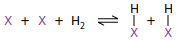

In [105]:
reaction_list_surf[62]

In [5]:
print(len(species_list), 'species')
print(len(reaction_list), 'reactions')

124 species
1887 reactions


In [25]:
print(len(species_list2), 'species')
print(len(reaction_list2), 'reactions')

15 species
24 reactions


# Look inside the species list

In [9]:
for i in range(10):
    print(species_list[i])
    display(species_list[i])

Ar


He


N2


Ne


butane(1)


O2(2)


CH(3)


C2H(4)


O(5)


CO(6)


In [15]:
print(species_list[4].to_adjacency_list())

butane
1  C u0 p0 c0 {2,S} {3,S} {5,S} {6,S}
2  C u0 p0 c0 {1,S} {4,S} {7,S} {8,S}
3  C u0 p0 c0 {1,S} {9,S} {10,S} {11,S}
4  C u0 p0 c0 {2,S} {12,S} {13,S} {14,S}
5  H u0 p0 c0 {1,S}
6  H u0 p0 c0 {1,S}
7  H u0 p0 c0 {2,S}
8  H u0 p0 c0 {2,S}
9  H u0 p0 c0 {3,S}
10 H u0 p0 c0 {3,S}
11 H u0 p0 c0 {3,S}
12 H u0 p0 c0 {4,S}
13 H u0 p0 c0 {4,S}
14 H u0 p0 c0 {4,S}



In [16]:
species_list[4].contains_surface_site()

False

In [22]:
# show reactants and products

print(reaction_list[0].reactants)
print(reaction_list[0].products)
display(reaction_list[0])

[Species(index=2, label="O2", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[3.53764,-0.00122828,5.36761e-06,-4.93131e-09,1.45956e-12,-1037.99,4.6718], Tmin=(100,'K'), Tmax=(1087.7,'K')), NASAPolynomial(coeffs=[3.16427,0.00169454,-8.00339e-07,1.59031e-10,-1.14892e-14,-1048.44,6.08305], Tmin=(1087.7,'K'), Tmax=(5000,'K'))], Tmin=(100,'K'), Tmax=(5000,'K'), comment="""Thermo library: BurkeH2O2"""), molecule=[Molecule(smiles="[O][O]")], transport_data=TransportData(shapeIndex=1, epsilon=(887.154,'J/mol'), sigma=(3.467,'angstrom'), dipoleMoment=(0,'De'), polarizability=(0,'angstrom^3'), rotrelaxcollnum=0.0, comment="""PrimaryTransportLibrary"""), molecular_weight=(31.9988,'amu')), Species(index=14, label="H", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[2.5,-2.06855e-14,2.66266e-17,-1.11497e-20,1.43542e-24,25472.7,-0.459566], Tmin=(100,'K'), Tmax=(4561.14,'K')), NASAPolynomial(coeffs=[2.50002,-1.64942e-08,5.30955e-12,-7.59275e-16,4.06972e-20,25472.7,-0.459688], Tmin=(4561.14,'K'), Tmax

In [20]:
type(reaction_list[100])

rmgpy.rmg.pdep.PDepReaction

# Find out how many species in Mech 2 are also in Mech 1

In [36]:
count = 0
for i in range(len(species_list)):
    for j in range(len(species_list2)):
        if species_list[i].is_isomorphic(species_list2[j]):
            print(f'Species list 1: {i} is isomorphic with species list 2: {j}')
            count += 1
            break
print(count, 'in common')

Species list 1: 0 is isomorphic with species list 2: 0
Species list 1: 1 is isomorphic with species list 2: 1
Species list 1: 2 is isomorphic with species list 2: 3
Species list 1: 3 is isomorphic with species list 2: 2
Species list 1: 5 is isomorphic with species list 2: 5
Species list 1: 8 is isomorphic with species list 2: 10
Species list 1: 11 is isomorphic with species list 2: 14
Species list 1: 13 is isomorphic with species list 2: 6
Species list 1: 14 is isomorphic with species list 2: 12
Species list 1: 16 is isomorphic with species list 2: 13
Species list 1: 17 is isomorphic with species list 2: 9
Species list 1: 18 is isomorphic with species list 2: 11
Species list 1: 21 is isomorphic with species list 2: 7
Species list 1: 26 is isomorphic with species list 2: 8
Species list 1: 44 is isomorphic with species list 2: 4
15 in common


In [32]:
species_list[44]

In [35]:
species_list2[4]

In [59]:
count = 0
for i in range(len(reaction_list)):
    for j in range(len(reaction_list2)):
        if reaction_list[i].is_isomorphic(reaction_list2[j]):
            print(f'Reaction list 1: {i} is isomorphic with reaction list 2: {j}')
            count += 1
#             if reaction_list[i].kinetics.comment != reaction_list2[j].kinetics.comment:
#                 print(f'Reaction list 1: {i} has different kinetics comment from reaction list 2: {j}')
                
            if not reaction_list[i].kinetics.is_identical_to(reaction_list2[j].kinetics):
                print(f'Reaction list 1: {i} has different kinetics from reaction list 2: {j}')
                print(type(reaction_list[i].kinetics))
            
            break
print(count, 'in common')

Reaction list 1: 0 is isomorphic with reaction list 2: 12
Reaction list 1: 0 has different kinetics from reaction list 2: 12
<class 'rmgpy.kinetics.arrhenius.Arrhenius'>
Reaction list 1: 1 is isomorphic with reaction list 2: 16
Reaction list 1: 1 has different kinetics from reaction list 2: 16
<class 'rmgpy.kinetics.arrhenius.MultiArrhenius'>
Reaction list 1: 2 is isomorphic with reaction list 2: 21
Reaction list 1: 2 has different kinetics from reaction list 2: 21
<class 'rmgpy.kinetics.arrhenius.Arrhenius'>
Reaction list 1: 3 is isomorphic with reaction list 2: 22
Reaction list 1: 3 has different kinetics from reaction list 2: 22
<class 'rmgpy.kinetics.arrhenius.Arrhenius'>
Reaction list 1: 4 is isomorphic with reaction list 2: 11
Reaction list 1: 4 has different kinetics from reaction list 2: 11
<class 'rmgpy.kinetics.falloff.ThirdBody'>
Reaction list 1: 10 is isomorphic with reaction list 2: 17
Reaction list 1: 10 has different kinetics from reaction list 2: 17
<class 'rmgpy.kineti

In [38]:
reaction_list[1220]

In [39]:
reaction_list2[14]

In [41]:
reaction_list[1220].kinetics

Arrhenius(A=(180000,'cm^3/(mol*s)'), n=2.8, Ea=(5.8,'kcal/mol'), T0=(1,'K'), comment="""Matched reaction 211 C2H6 + O_rad <=> C2H5b + OH_p23 in H_Abstraction/training
This reaction matched rate rule [C/H3/Cs\H3;O_atom_triplet]
family: H_Abstraction""")

In [40]:
reaction_list2[14].kinetics

Arrhenius(A=(180000,'cm^3/(mol*s)'), n=2.8, Ea=(5.8,'kcal/mol'), T0=(1,'K'), comment="""Matched reaction 211 C2H6 + O_rad <=> C2H5b + OH_p23 in H_Abstraction/training
This reaction matched rate rule [OH_rad_H;C_rad/H2/Cs\H3]
family: H_Abstraction""")

In [47]:
reaction_list[800]

In [48]:
reaction_list2[5]

In [45]:
reaction_list[800].kinetics

Chebyshev(coeffs=[[8.169,-1.093,-0.1863,0.02213],[3.448,0.8559,0.02348,-0.05431],[0.1643,0.2276,0.09746,-0.009475],[0.0222,0.01019,0.04347,0.01639],[-0.008387,-0.02724,0.003918,0.01137],[-0.006102,-0.01791,-0.006703,0.002573]], kunits='cm^3/(mol*s)', Tmin=(300,'K'), Tmax=(2000,'K'), Pmin=(0.01,'atm'), Pmax=(98.692,'atm'))

In [46]:
reaction_list2[5].kinetics

Chebyshev(coeffs=[[13.22,-1.029,-0.3072,0.0124],[0.6133,0.9072,0.171,-0.07282],[0.02891,0.1927,0.1311,0.02488],[-0.07081,-0.01164,0.0303,0.03011],[-0.06291,-0.04131,-0.01129,0.009962],[-0.03744,-0.0259,-0.01549,-0.002653]], kunits='cm^3/(mol*s)', Tmin=(300,'K'), Tmax=(3000,'K'), Pmin=(0.001,'atm'), Pmax=(98.692,'atm'))

In [67]:
# Check if reactions defined in same direction
def reactions_in_same_direction(reaction1, reaction2):
    assert reaction1.is_isomorphic(reaction2), 'Reactions are not even isomorphic'
    if len(reaction1.reactants) != len(reaction2.reactants):
        return False
    reactants_to_match = [r for r in reaction1.reactants]
    counter = 0
    while reactants_to_match:
        for i in range(len(reaction2.reactants)):
            if reaction2.reactants[i].is_isomorphic(reactants_to_match[0]):
                reactants_to_match.remove(reactants_to_match[0])
                break
        else:
            return False
        
        
        if counter >= len(reaction1.reactants):
            return False
        counter += 1
        
    return True
        

def get_reverse_reaction(reaction):
    assert reaction.kinetics is not None
    rev_reaction = copy.deepcopy(reaction)
    tmp_reactants = rev_reaction.reactants
    rev_reaction.reactants = rev_reaction.products
    rev_reaction.products = tmp_reactants
    rev_reaction.kinetics = reaction.generate_reverse_rate_coefficient()
    return rev_reaction

In [68]:
print(reactions_in_same_direction(reaction_list[0], reaction_list2[12]))

True


In [70]:
reaction_list[0]

In [69]:
get_reverse_reaction(reaction_list[0])

In [72]:
reaction_list[0].kinetics.Ea.value_si

63956.623999999996

In [73]:
get_reverse_reaction(reaction_list[0]).kinetics.Ea.value_si

-5794.576811338679

In [61]:
reaction_list2[12].kinetics

Chebyshev(coeffs=[[6.745,-0.0003151,-0.000236,-0.0001448],[6.509,0.0001462,0.0001095,6.717e-05],[0.1592,7.486e-05,5.606e-05,3.439e-05],[0.05994,4.574e-05,3.425e-05,2.101e-05],[0.02717,-3.258e-06,-2.438e-06,-1.495e-06],[0.008564,-1.986e-05,-1.487e-05,-9.119e-06]], kunits='cm^3/(mol*s)', Tmin=(300,'K'), Tmax=(3000,'K'), Pmin=(0.001,'atm'), Pmax=(98.692,'atm'))

In [78]:
reaction_list[2]

In [79]:
reaction_list2[21]

In [75]:
reaction_list[2].kinetics

Arrhenius(A=(2.16e+08,'cm^3/(mol*s)'), n=1.51, Ea=(3.43,'kcal/mol'), T0=(1,'K'))

In [76]:
reaction_list2[21].kinetics

Arrhenius(A=(1.82e+09,'cm^3/(mol*s)'), n=1.21, Ea=(20.07,'kcal/mol'), T0=(1,'K'), comment="""Matched reaction 311 H2 + OH <=> H2O_p + H_p in H_Abstraction/training
This reaction matched rate rule [H2;O_pri_rad]
family: H_Abstraction""")

In [80]:
reaction_list[2].kinetics.is_similar_to(reaction_list2[21].kinetics)

False

In [81]:

def plot_kinetics(rxns, labels=None):
    """Function for plotting reaction kinetics
    Takes in a list of RMG reactions (rmgpy.reaction.Reaction) or a single reaction
    """
    plt.xlabel('1000 / T (K^-1)')
    plt.ylabel('log10(k)')

    if type(rxns) != list:
        rxns = [rxns]

    T = np.linspace(300, 3000, 1001)
    for rxn in rxns:
        k = np.zeros(len(T))
        for i in range(0, len(T)):
            k[i] = rxn.get_rate_coefficient(T[i], 101325)
        plt.plot(1000.0 / T, np.log10(k))

    if labels:
        plt.legend(labels)
    plt.show()


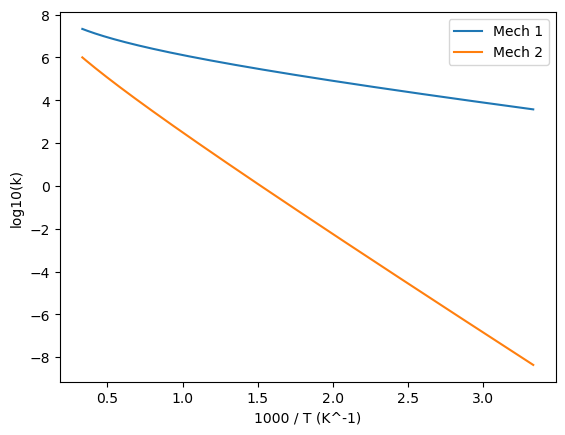

In [85]:
plot_kinetics([reaction_list[2], reaction_list2[21]], ['Mech 1', 'Mech 2'])

In [86]:
rev1 = get_reverse_reaction(reaction_list[2])
rev2 = get_reverse_reaction(reaction_list2[21])

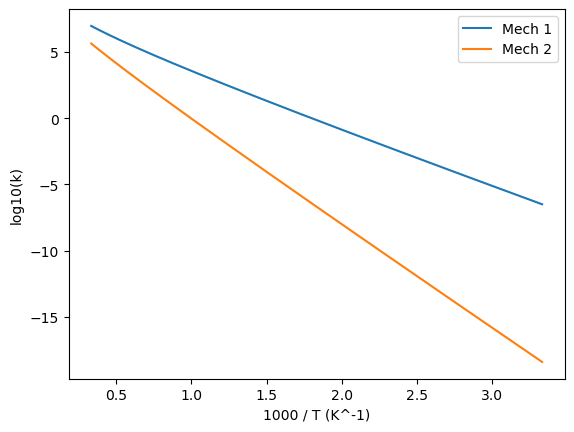

In [87]:
plot_kinetics([rev1, rev2], ['Mech 1', 'Mech 2'])

In [77]:
reactions_in_same_direction(reaction_list[2], reaction_list2[21])

True

In [30]:
species_list2[4]

In [31]:
species_list[0]

In [17]:
dir(reaction_list[40])

['SurfaceArrhenius',
 'SurfaceChargeTransfer',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_CHE_model',
 '_degeneracy',
 '_get_free_energy_of_charge_transfer_reaction',
 '_protons',
 '_repr_png_',
 'allow_max_rate_violation',
 'allow_pdep_route',
 'apply_solvent_correction',
 'calculate_coll_limit',
 'calculate_microcanonical_rate_coefficient',
 'calculate_tst_rate_coefficient',
 'calculate_tst_rate_coefficients',
 'can_tst',
 'check_collision_limit_violation',
 'comment',
 'copy',
 'degeneracy',
 'draw',
 'duplicate',
 'electrons',
 'elementary_high_p',
 'ensure_species',
 'entry',
 'family',
 'fix_barrier_height',
 'fix_diffusion_limited

In [13]:
species_list[40].smiles

'[CH]=C'

In [ ]:
len()